# Тема 1

# Введение

 1. Обзор материала семестра
 2. Общие постановки задач оптимизации
 3. Примеры реальных задач
 4. Общая схема решения
 5. Сравнение методов оптимизации

## Обзор материала весеннего семестра

1. Введение и примеры задач
2. Методы нулевого порядка
3. Теория выпуклой оптимизации
4. Методы первого порядка
5. Метод Ньютона и квазиньютоновские методы
6. Условная оптимизация с простыми ограничениями
7. Методы внутренней точки
8. Введение в теорию оптимального управления

## Организация работы в семестре

1. Две пары раз в неделю
2. Домашнее задание почти каждую неделю: $\TeX$ или Jupyter Notebook
3. Миниконтрольные в начале каждого занятия
4. Промежуточная контрольная в середине семестра
5. Устный зачёт в конце семестра
6. Накопительная система выставления финальной оценки

## Инструменты и литература

Инструменты:

- $\TeX$
- Python 3, CVXPy & Jupyter Notebook
- Matlab (иногда)

Литература:

- [Введение в оптимизацию, Б.Т. Поляк](http://elementy.ru/catalog/3461/Polyak_B_T_Vvedenie_v_optimizatsiyu_DjVu_6_Mb_premolab_ru_sites_default_files_polyak_optimizationintro_djvu)
- [Методы выпуклой оптитмизации, Ю. Е. Нестеров](http://premolab.ru/pub_files/pub5/MnexoB89z7.pdf)
- [Convex Optimization by S. Boyd & L. Vandenberghe](https://web.stanford.edu/~boyd/cvxbook/bv_cvxbook.pdf)
- [Numerical Optimization by J. Nocedal & S. Wright](http://www.深度学习.top/literature/Nocedal_Wright_Numerical_optimization_v2.pdf)
- [Clever algorithms: nature-inspired programming recipes by J. Brownlee](https://doc.lagout.org/science/0_Computer%20Science/2_Algorithms/Clever%20Algorithms_%20Nature-Inspired%20Programming%20Recipes%20%5BBrownlee%202012-06-15%5D.pdf)

## Методология

Основные этапы использования методов оптимизации при решении 

реальных задач:
1. Определение целевой функции
2. Определение допустимого множества решений
3. Постановка и анализ оптимизационной задачи
4. Выбор наилучшего алгоритма для решения поставленной задачи
5. Реализация алгоритма и проверка его корректности

## Постановка задачи

\begin{align*}
& \min_{x \in S} f_0(x)\\
\text{s.t. } & f_j(x) = 0, \; j = 1,\ldots,m\\
& g_k(x) \leq 0, \; k = 1,\ldots,p
\end{align*}
где $S \subseteq \mathbb{R}^n$, $f_j: S \rightarrow \mathbb{R}, \; j = 0,\ldots,m$, $g_k: S \rightarrow \mathbb{R}, \; k=1,\ldots,p$

Пример: выбор объектов для вложения денег и 

определение в какой объект сколько вкладывать

- $x$ — размер инвестиций в каждый актив
- $f_0$ — суммарный риск или вариация прибыли
- $f_j, g_k$ — бюджетные ограничения, min/max вложения в актив, минимально допустимая прибыль

## Основные определения

1. Точка $x^*$ называется точкой **локального минимума** функции $f(x)$, если для некоторого $\varepsilon > 0$ выполнено $f(x^*) < f(y), y \in O_{\varepsilon}(x^*)$
2. Дайте аналогично определение глобальному минимуму

Везде далее рассматривается задача поиска локального минимума, если не оговорено обратное.

### Важные частные случаи

- Оптимизация на дискретном множестве (1-2 недели)
- Безусловная оптимизация
- Условная оптимизация с простыми ограничениями
- Условная оптимизация общего вида

## Нельзя так просто взять и решить задачу оптимизации

В общем случае: 
- NP-полные
- рандомизированные алгоритмы: время vs стабильность 
        
НО определённые классы задач могут быть решены быстро!
- Линейное программирование
- Метод наименьших квадратов 
- Малоранговое приближение порядка $k$ 
- **Выпуклая оптимизация**

## Задача выпуклой оптимизации

- Минимизация выпуклой функции на выпуклом множестве
- Формально
\begin{align*}
& \min_{x \in \mathbb{R}^n} f_0(x) \\
\text{s.t. } & Ax = b\\
& f_j(x) \leq 0, \; j = 1,\ldots, m,
\end{align*}
где $f_0$ и $f_j$ выпуклые функции
- Функция называется выпуклой, если она определена на выпуклом множестве и отрезок, соединяющий любые две точки графика, расположен выше самого графика
- Упражнение: запишите это определение формально

### "The great watershed in optimization is not between linearity and non-linearity, but convexity and non-convexity"

Причины:
- Локальный оптимум является глобальным
- Необходимое условие оптимальности является достаточным

Вопросы:
- Любую ли задачу выпуклой оптимизации можно эффективно решить?
- Можно ли эффективно решить невыпуклые задачи оптимизации?

## Примеры реальных задач и их формализация

- Аппроксимация функции по известным точкам (см. лабораторные работы по физике)
- Поиск круга (или эллипса) минимальной площади, покрывающего заданные точки
- Определение пространственной конфигурации аминокислот для минимизации общей энергии белка
- Сглаживание и очистка от шума заданного сигнала или изображения

## Аналитические результаты для дифференцируемых функций: анонс
- Необходимое условие первого порядка: если $x^*$ точка локального минимума дифференцируемой функции $f(x)$, тогда $$
f'(x^*) = 0
$$
- Необходимое условие второго порядка: если $x^*$ точка локального минимума дважды дифференцируемой функции $f(x)$, тогда 
$$
f'(x^*) = 0 \quad \text{и} \quad f''(x^*) \succeq 0
$$
- Достаточное условие: пусть $f(x)$ дважды дифференцируемая функция, и пусть точка $x^*$ удовлетворяет условиям
$$
f'(x^*) = 0 \quad f''(x^*) \succ 0,
$$
тогда $x^*$ является точкой строго локального минимума функции $f(x)$.

## Особенности численного решения

1. Точно решить задачу принципиально невозможно из-за погрешности машинной арифметики
2. Необходимо задать критерий обнаружения решения
3. Необходимо определить, какую информацию о задаче использовать

## Общая итеративная схема

Дано: начальное приближение $x$, требуемая точность $\varepsilon$.

```python
def GeneralScheme(x, epsilon):
    
    while StopCriterion(x) > epsilon:
        
        OracleResponse = RequestOracle(x)
        
        UpdateInformation(I, x, OracleResponse)
        
        x = NextPoint(I, x)
        
    return x
```

### Вопросы
1. Какие критерии остановки могут быть?
2. Что такое оракул и зачем он нужен?
3. Что такое информационная модель?
4. Как вычисляется новая точка?

#### Критерии остановки
1. Сходимость по аргументу: 
$$
\| x_k - x^*  \|_2 < \varepsilon
$$ 
2. Сходимость по функционалу: 
$$
\| f_k - f^* \|_2 < \varepsilon
$$ 
3. Выполнение необходимого условия для дифференцируемой функции 
$$
\| f'(x_k) \|_2 < \varepsilon
$$

Но ведь $x^*$ неизвестна!

Тогда
\begin{align*}
& \|x_{k+1} - x_k \| = \|x_{k+1} - x_k + x^* - x^* \| \\
& \leq \|x_{k+1} - x^* \| + \| x_k - x^* \| \leq 2\varepsilon
\end{align*}

**Замечание**: лучше использовать относительные изменения этих величин! Например $\dfrac{\|x_{k+1} - x_k \|_2}{\| x_k \|_2}$


#### Что такое оракул?
**Определение**: оракулом называют некоторое абстрактное 

устройство,
которое отвечает на последовательные вопросы 

метода

**Концепция чёрного ящика**
1. Единственной информацией, получаемой в ходе работы итеративного метода, являются ответы оракула
2. Ответы оракула являются *локальными*

#### Информация о задаче
1. Каждый ответ оракула даёт локальную информацию о поведении функции в точке
2. Агрегируя все полученные ответы оракула, обновляем информацию о глобальном виде целевой функции:
    - кривизна
    - направление убывания
    - etc

#### Вычисление следующей точки

$$
x_{k+1} = x_{k} + \alpha_k h_k
$$

- **Линейный поиск**: фиксируется направление $h_k$ и производится поиск по этому направлению "оптимального" значения  $\alpha_k$
- **Метод доверительных областей**: 
    - фиксируется допустимый размер *области* по некоторой норме $\| \cdot  \| \leq \alpha$ и *модель* целевой функции, которая хорошо её аппроксимирует в выбранной области. 
    - далее производится поиск направления $h_k$, минимизирующего модель целевой функции и не выводящего точку $x_k + h_k$ за пределы доверительной области

Вопросы:
1. Как выбрать $\alpha_k$?
2. Как выбрать $h_k$?
3. Как выбрать модель?
4. Как выбрать область?
5. Как выбрать размер области? 

## Как сравнивать методы оптимизации?
Для заданного класса задач сравнивают следующие величины:
1. Сложность
    - аналитическая: число обращений к оракулу для решения задачи с точностью $\varepsilon$
    - арифметическая: общее число всех вычислений, необходимых для решения задачи с точностью $\varepsilon$
2. Скорость сходимости
3. Эксперименты

### Скорости сходимости 
1. Сублинейная
$$
\| x_{k+1} - x^* \|_2 \leq C k^{\alpha},
$$
где $\alpha < 0$ и $ 0 < C < \infty$
2. Линейная (геометрическая прогрессия)
$$
\| x_{k+1} - x^* \|_2 \leq Cq^k, 
$$
где $q \in (0, 1)$ и $ 0 < C < \infty$

3. Сверхлинейная 
$$
\| x_{k+1} - x^* \|_2 \leq Cq^{k^2}, 
$$
где $q \in (0, 1)$ и $ 0 < C < \infty$
4. Квадратичная
$$
\| x_{k+1} - x^* \|_2 \leq C\| x_k - x^* \|^2_2, \qquad \text{или} \qquad \| x_{k+1} - x^* \|_2 \leq C q^{2^k}
$$
где $q \in (0, 1)$ и $ 0 < C < \infty$

### Оптимальные методы: can we do better?
- Доказывают нижние оценки скоростей сходимости для класса задач и методов фиксированного порядка
- Предлагают методы, на которых эти нижние оценки достигаются $\Rightarrow$ доказана оптимальность 
- Ниже про значение теорем сходимости

Оптимальным методам и нижним оценкам будет, возможно, посвящён отдельный семинар.

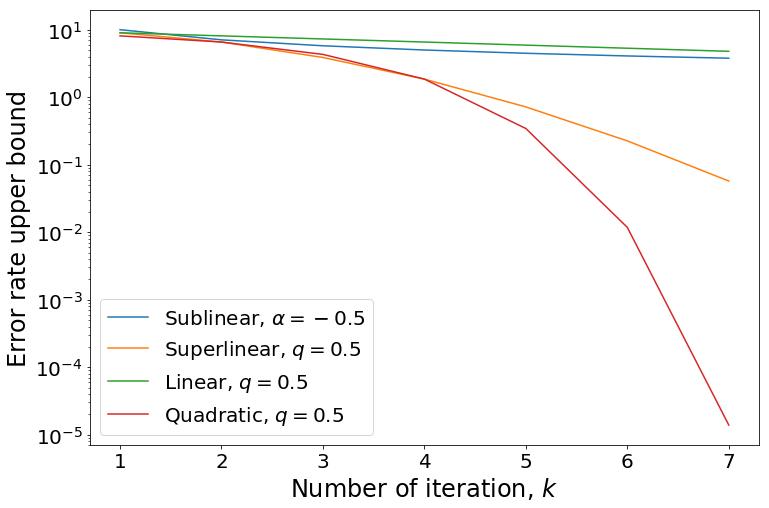

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
C = 10
alpha = -0.5
q = 0.9
num_iter = 7
sublinear = np.array([C * k**alpha for k in range(1, num_iter + 1)])
linear = np.array([C * q**k for k in range(1, num_iter + 1)])
superlinear = np.array([C * q**(k**2) for k in range(1, num_iter + 1)])
quadratic = np.array([C * q**(2**k) for k in range(1, num_iter + 1)])
plt.figure(figsize=(12,8))
plt.semilogy(np.arange(1, num_iter+1), sublinear, 
             label=r"Sublinear, $\alpha = -0.5$")
plt.semilogy(np.arange(1, num_iter+1), superlinear, 
             label=r"Superlinear, $q = 0.5$")
plt.semilogy(np.arange(1, num_iter+1), linear, 
             label=r"Linear, $q = 0.5$")
plt.semilogy(np.arange(1, num_iter+1), quadratic, 
             label=r"Quadratic, $q = 0.5$")
plt.xlabel("Number of iteration, $k$", fontsize=24)
plt.ylabel("Error rate upper bound", fontsize=24)
plt.legend(loc="best", fontsize=20)
plt.xticks(fontsize = 20)
_ = plt.yticks(fontsize = 20)

### Значение теорем сходимости (Б.Т. Поляк Введение в оптимизацию, гл. 1, $\S$ 6)
1. Что дают теоремы сходимости
     - класс задач, для которых можно рассчитывать на применимость метода (важно не завышать условия!)
         - выпуклость
         - гладкость
     - качественное поведение метода
         - существенно ли начальное приближение
         - по какому функционалу есть сходимость
     - оценку скорости сходимости
         - теоретическая оценка поведения метода без проведения экспериментов
         - определение факторов, которые влияют на сходимость (обусловленность, размерность, etc)
         - иногда заранее можно выбрать число итераций для достижения заданной точности 

2. Что **НЕ** дают теоремы сходимости
    - сходимость метода **ничего не говорит** о целесообразности его применения
    - оценки сходимости зависят от неизвестных констант - неконструктивный характер
    - учёт ошибок округления и точности решения вспомогательных задач
    
**Мораль**: нужно проявлять разумную осторожность и здравый смысл!

## Классификация методов

Требование к оракулу

1. Методы нулевого порядка: оракул возвращает только значение функции $f(x)$

2. Методы первого порядка: оракул возвращает значение функции $f(x)$ и её градиент $f'(x)$

3. Методы второго порядка: оракул возвращает значение функции $f(x)$, её градиент $f'(x)$ и гессиан $f''(x)$.

Требование доступа к истории для поиска следующей точки
1. Одношаговые методы 
$$
x_{k+1} = \Phi(x_k)
$$
2. Многошаговые методы
$$
x_{k+1} = \Phi(x_k, x_{k-1}, ...)
$$

## Резюме

1. Введение в предмет Методы оптимизации
2. Общая схема работы метода оптимизации
3. Способы сравнивнения методов оптимизации
4. Зоопарк задач и методов